In [32]:
%matplotlib inline

## Results SSD

In [1]:
import matplotlib.pyplot as plt
import os

In [4]:
#filename = "/home/maggie/Dokumente/Diplomarbeit/taurus_results/ssd/11_6_0.0001_lr_bs_32/run1.log"
#filename = "/home/maggie/Dokumente/Diplomarbeit/taurus_results/ssd/0.001_bs_32/run_24_0.5_aug.log"
#filename = "/home/maggie/Dokumente/Diplomarbeit/taurus_results/ssd/learn_rates/02_12_0.000001_32/run1.log"
filename = "/home/maggie/Dokumente/Diplomarbeit/taurus_results/ssd/12_12_0.001_32_pre_3_default_weight/run1.log"

In [5]:
def get_stats(filename):
    lines = [line.rstrip('\n') for line in open(filename) if "INFO:Epoch" in line] 
    epoch = []
    epoch_val = []
    lr = []
    avg_loss = []
    val_loss = []
    avg_reg_loss = []
    avg_cls_loss = []
    val_reg_loss = []
    val_cls_loss = []

    for line in lines:
        parts = line.split()
        num_ele = len(parts)
        if num_ele == 6:
            lr.append(float(parts[5].replace(',', '')))
            epoch.append(int(parts[2].replace(',', '')))
        elif num_ele == 16:
            avg_loss.append(float(parts[7].replace(',', '')))
            avg_reg_loss.append(float(parts[11].replace(',', '')))
            avg_cls_loss.append(float(parts[15]))
        elif num_ele == 14:
            epoch_val.append(int(parts[2].replace(',', '')))
            val_loss.append(float(parts[5].replace(',', '')))
            val_reg_loss.append(float(parts[9].replace(',', '')))
            val_cls_loss.append(float(parts[13]))
    
    return epoch, epoch_val, avg_loss, val_loss, avg_reg_loss, avg_cls_loss, val_reg_loss, val_cls_loss, lr

In [6]:
start_lr = 0.001
batch_size = 32

In [7]:
epoch, epoch_val, avg_loss, val_loss, avg_reg_loss, avg_cls_loss, val_reg_loss, val_cls_loss, lr = get_stats(filename)

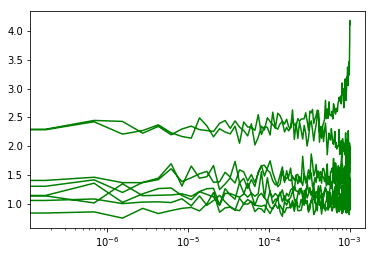

In [8]:
plt.semilogx(lr, avg_loss, 'g-')

In [9]:
base_path = os.path.dirname(filename)

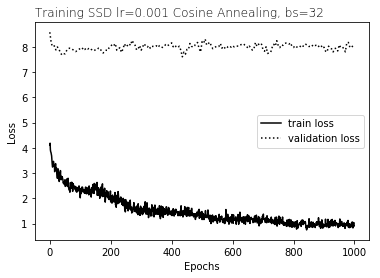

In [10]:
plt.plot(epoch, avg_loss, 'k-', label="train loss")
plt.plot(epoch_val, val_loss,'k:',label="validation loss" )

plt.legend()

# Add titles
plt.title("Training SSD lr="+str(start_lr)+" Cosine Annealing, bs="+str(batch_size), loc='left', fontsize=12, fontweight=0,)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.savefig(os.path.join(base_path,"loss_ssd_fm_12.pdf"), dpi=150)

Text(0,0.5,'Loss')

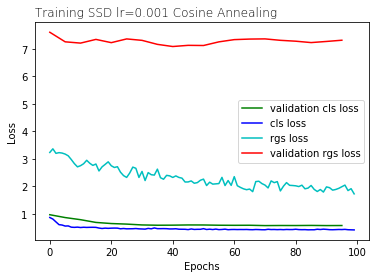

In [12]:
#plt.plot(epoch[:1000], avg_loss[:1000], 'b-', label="train loss")
#plt.plot(epoch_val[:200], val_loss[:200],'g-',label="validation loss" )
plt.plot(epoch_val[:20], val_cls_loss[:20],'g-',label="validation cls loss" )
plt.plot(epoch[:100], avg_cls_loss[:100],'b-',label="cls loss" )
plt.plot(epoch[:100], avg_reg_loss[:100],'c-',label="rgs loss" )
plt.plot(epoch_val[:20], val_reg_loss[:20],'r-',label="validation rgs loss" )

plt.legend(loc='right')

# Add titles
plt.title("Training SSD lr=0.001 Cosine Annealing", loc='left', fontsize=12, fontweight=0,)
plt.xlabel("Epochs")
plt.ylabel("Loss")

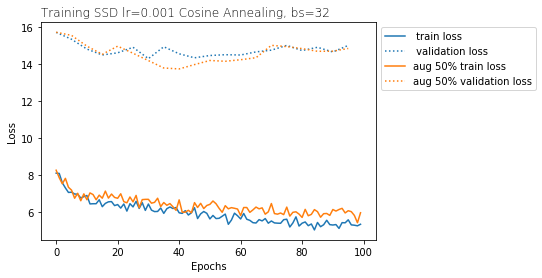

In [19]:
files = ["run_24.log", "run_24_0.5_aug.log"]
i = 0
#parameters = ["~1M P", "~1,7M P", "~3,5M P", "~6,1M P", "~6,1M P pre trained"]
parameters=["","aug 50%"]
max_size = 100
max_val = int(max_size/5)
for file in files:
    epoch, epoch_val, avg_loss, val_loss, avg_reg_loss, avg_cls_loss, val_reg_loss, val_cls_loss, lr = get_stats(os.path.join(base_path,file))

    plt.plot(epoch[:max_size], avg_loss[:max_size], 'C'+str(i)+'-', label=parameters[i]+" train loss")
    plt.plot(epoch_val[:max_val], val_loss[:max_val],'C'+str(i)+':',label=parameters[i]+" validation loss" )
    i += 1

plt.legend(loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
#ax.legend(items,title="Legend",loc="upper left",
#          bbox_to_anchor=(1, 0, 0.5, 1))

# Add titles
plt.title("Training SSD lr="+str(start_lr)+" Cosine Annealing, bs="+str(batch_size), loc='left', fontsize=12, fontweight=0,)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.savefig(os.path.join(base_path,"loss_ssd_24_all.pdf"), dpi=150, bbox_inches='tight')